**Vamos experimentar agora o algoritmo Decision Tree?**

In [57]:
!pip -q install yellowbrick
!pip install --upgrade sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [59]:
import pickle
with open('/content/sample_data/restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [60]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [61]:
previsoes = modelo.predict(X_teste)

In [62]:
previsoes

array(['Nao', 'Sim', 'Sim'], dtype=object)



> **Será se o modelo acertou?**



In [63]:
y_teste

,Conclusao
10,Nao
9,Nao
0,Sim


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [65]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666

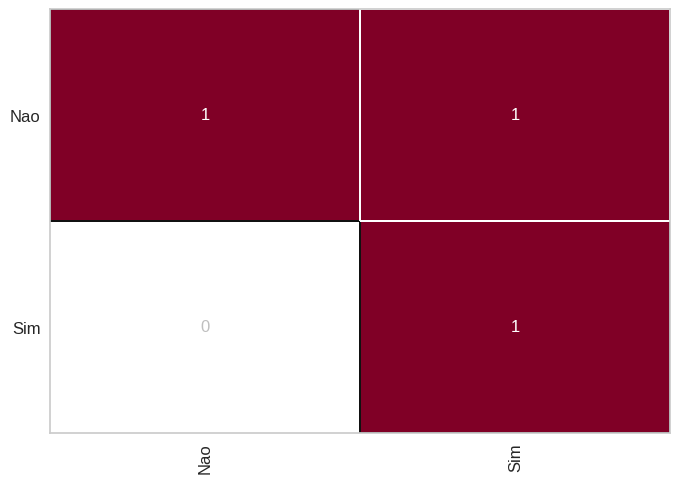

In [66]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [67]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



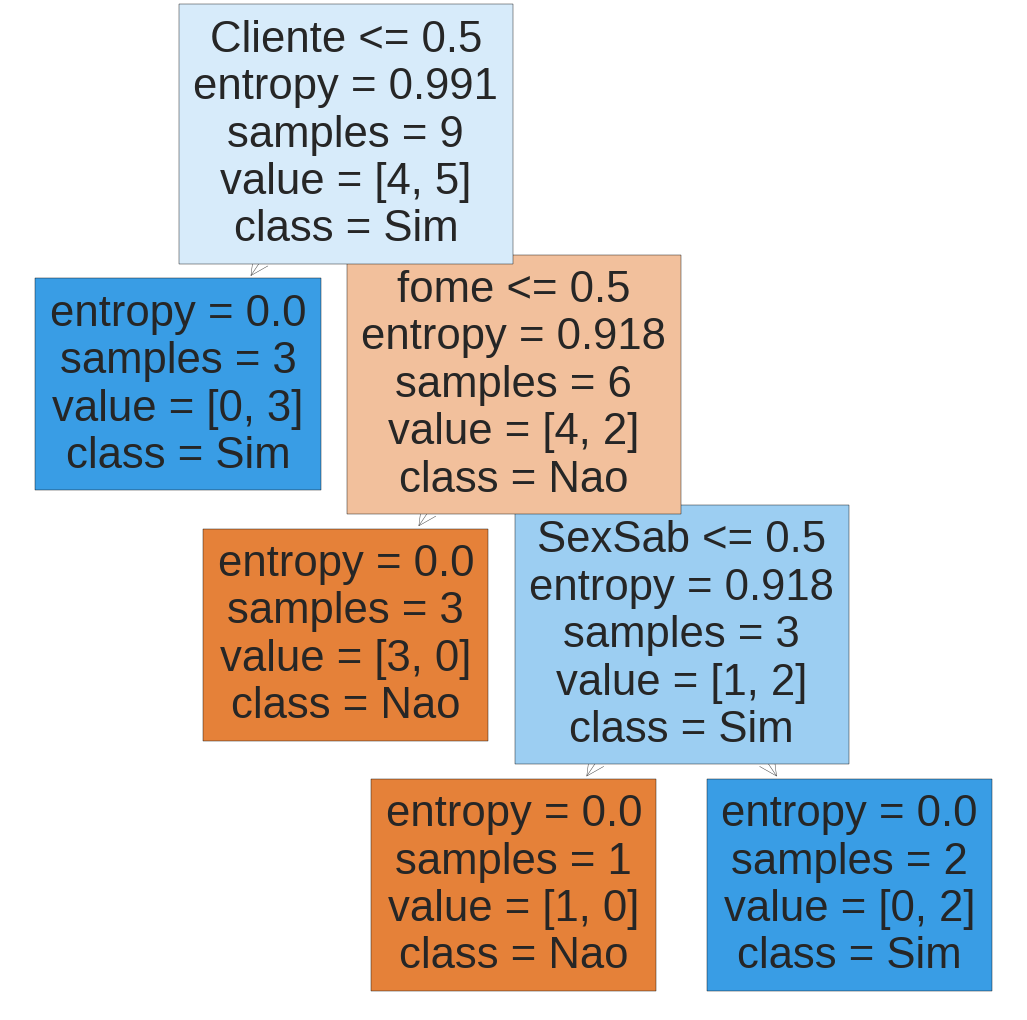

In [68]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);